<a href="https://colab.research.google.com/github/justinMetayer/SalesforceProjectManagerPrototype/blob/master/TD1_Analyses_en_caract%C3%A8res.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fouille de Textes et Scraping - TD1 Analyses en caractères

## Exercice n°1 : Distribution des mots selon la taille en caractères

Nous allons implanter le calcul de la distribution des mots d’un texte (son vocabulaire) en fonction de leur taille en caractères. Ainsi, vous devrez calculer le nombre de
mots uniques pour une taille donnée.

L’axe des abscisses représente la taille d’un mot en caractères et l’axe des ordonnées représente le nombre de mots uniques correspondant à cette taille.
Pour préparer votre espace de travail sur votre notebook Jupyter, créez un dossier dans lequel vous enregistrerez votre code et vos données.

Pous constituer un corpus, vous utiliserez les fichiers textes suivants (choisissez plain text utf-8):
- "Le discours de la m´ethode" (fr) http://www.gutenberg.org/ebooks/13846
- "Ulysses" (en) http://www.gutenberg.org/ebooks/4300

Les étapes :
1. lire les textes
2. découper en mots (ou tokeniser)
3. compter le nombre de mots par taille de caractères
4. observer les résultats chiffrés
5. représenter cela sur une courbe

### Etape 1 : lire

On va lire les fichiers TXT au format plein texte utf-8 précédemment téléchargé puis afficher une partie de ceux-ci afin d'être sûre que la lecture est effective.

Sur [Google Colab](https://colab.research.google.com/), les documents se trouve dans le dossier **/content**.

***Si vous voulez rééxécuter pensez a changer le path des fichiers.***

In [1]:
# On fait les imports
import nltk
import matplotlib
import seaborn
import gensim
import numpy
import sklearn
nltk.download('brown')

# Separator
print("\n\n ===== ----- ===== \n\n")

# Premier document
fileDiscoursDeLaMethode = open("/content/Discours de la méthode by René Descartes.txt")
chaineFileDDLM = fileDiscoursDeLaMethode.read ()
fileDiscoursDeLaMethode.close ()

print(" > Test premier document - START TEST de lecture")
print(chaineFileDDLM[:100])
print(" > Test premier document - END TEST de lecture")

# Separator
print("\n\n ===== ----- ===== \n\n")

# Deuxieme document
fileUlysses = open("/content/Ulysses by James Joyce.txt")
chaineFileU = fileUlysses.read ()
fileUlysses.close ()

print(" > Test deuxieme document - START TEST de lecture")
print(chaineFileU[:100])
print(" > Test deuxieme document - END TEST de lecture")


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


 ===== ----- ===== 


 > Test premier document - START TEST de lecture
﻿The Project Gutenberg EBook of Discours de la méthode, by René Descartes

This eBook is for the use
 > Test premier document - END TEST de lecture


 ===== ----- ===== 


 > Test deuxieme document - START TEST de lecture
﻿
The Project Gutenberg EBook of Ulysses, by James Joyce

This eBook is for the use of anyone anywhe
 > Test deuxieme document - END TEST de lecture


### Etape 2 : découper

Dans cette partie, nous allons découper le document un tableau de mot grâce au **.split()** puis compter le nombre de mot.

In [2]:
# Pour le premier document 
listeMotsFileDDLM = chaineFileDDLM.split() # Approximation des occurences
print(" ----- Premier document ----- ")
print("Nombre de mots : %i" %len(listeMotsFileDDLM))

# Pour le deuxime document 
listeMotsFileU = chaineFileU.split() # Approximation des occurences
print("\n ----- Deuxieme document ----- ")
print("Nombre de mots : %i" %len(listeMotsFileU))

 ----- Premier document ----- 
Nombre de mots : 118787

 ----- Deuxieme document ----- 
Nombre de mots : 268132


### Etape 3 : compter

On va utiliser un dictionnaire (ou tableau associatif) où l’on va stocker pour chaque longueur en caractères le nombre de mots qu’on a rencontré. 

Le fonctionnement est le suivant:
- pour chaque mot de la liste de mots, on calcule sa longueur
- on vérifie si on a déjà rencontré un mot de cette longueur :
  + Si c'est le premier mot pour cette longueur on crée une clé pour cette longueur à laquelle on affecte la valeur 1
  + Sinon, on incrémente de 1 la valeur existante

In [3]:
# Fonction pour remplir le dictionnaire pour pouvoir le faire plus simplement sur les deux livres sans répéter le code
def setDicLongueur(listMots):
  # On créer un dictionnaire vide
  dicLongueurs = {}

  #On parcours le tableau de list de mots - mot par mot
  for mot in listMots :
    longueur = len(mot) # Longueur du mot
    if longueur not in dicLongueurs : #Si elle n'est pas déjà vu
      dicLongueurs[longueur] = 1 
    else: # Sinon
      dicLongueurs[longueur] += 1

  return dicLongueurs

# Premier document
print(" ----- Premier document ----- ")
dicLongueursFileDDLM = setDicLongueur(listeMotsFileDDLM)
print(dicLongueursFileDDLM)

# Deuxième document
print("\n ----- Deuxieme document ----- ")
dicLongueursFileU = setDicLongueur(listeMotsFileU)
print(dicLongueursFileU)


 ----- Premier document ----- 
{4: 15694, 7: 9158, 9: 6051, 5: 13169, 2: 26680, 8: 6888, 3: 18999, 6: 9970, 12: 1476, 11: 2294, 17: 16, 10: 3986, 13: 861, 1: 2798, 14: 501, 15: 160, 16: 69, 18: 4, 20: 2, 38: 1, 24: 2, 22: 1, 39: 1, 30: 1, 21: 2, 29: 1, 19: 1, 23: 1}

 ----- Deuxieme document ----- 
{1: 9461, 3: 55194, 7: 21186, 9: 9520, 5: 33859, 2: 40613, 8: 14209, 4: 44409, 6: 25876, 12: 1971, 11: 3606, 17: 77, 14: 507, 10: 6124, 13: 1088, 15: 229, 19: 19, 16: 105, 18: 26, 37: 1, 20: 10, 21: 10, 24: 6, 71: 2, 22: 4, 27: 2, 34: 3, 28: 2, 30: 2, 25: 2, 23: 1, 31: 1, 39: 1, 29: 1, 26: 3, 53: 1, 36: 1}


### Etape 4: observer

In [4]:
def viewDicLongueur(dicLongueurs) :
  for index in range(30):
    if index in dicLongueurs :
      nbrOccurences = dicLongueurs[index]
      print("%i : %i"%(index , nbrOccurences ))
    else:
      nbrOccurences = 0
      print("%i : %i"%(index , nbrOccurences ))

# Premier document
print(" ----- Premier document ----- ")
viewDicLongueur(dicLongueursFileDDLM)

# Deuxième document
print("\n ----- Deuxieme document ----- ")
viewDicLongueur(dicLongueursFileU)

 ----- Premier document ----- 
0 : 0
1 : 2798
2 : 26680
3 : 18999
4 : 15694
5 : 13169
6 : 9970
7 : 9158
8 : 6888
9 : 6051
10 : 3986
11 : 2294
12 : 1476
13 : 861
14 : 501
15 : 160
16 : 69
17 : 16
18 : 4
19 : 1
20 : 2
21 : 2
22 : 1
23 : 1
24 : 2
25 : 0
26 : 0
27 : 0
28 : 0
29 : 1

 ----- Deuxieme document ----- 
0 : 0
1 : 9461
2 : 40613
3 : 55194
4 : 44409
5 : 33859
6 : 25876
7 : 21186
8 : 14209
9 : 9520
10 : 6124
11 : 3606
12 : 1971
13 : 1088
14 : 507
15 : 229
16 : 105
17 : 77
18 : 26
19 : 19
20 : 10
21 : 10
22 : 4
23 : 1
24 : 6
25 : 2
26 : 3
27 : 2
28 : 2
29 : 1


### Etape 5 : représenter

 ----- Premier document ----- 


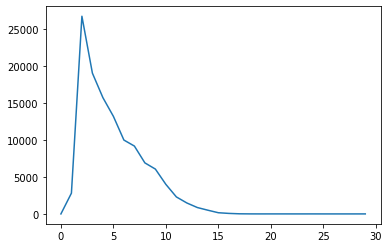


 ----- Deuxieme document ----- 


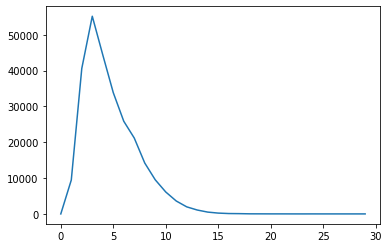

In [5]:
import matplotlib .pyplot as pyplot

def representDicLongueur(dicLongueurs) :
  listeEffectifs = []
  for toto in range(30):
    if toto in dicLongueurs :
      listeEffectifs.append(dicLongueurs[toto ])
    else:
      listeEffectifs.append(0)
    
  pyplot.plot(listeEffectifs)
  pyplot.show()

# Premier document
print(" ----- Premier document ----- ")
representDicLongueur(dicLongueursFileDDLM)

# Deuxième document
print("\n ----- Deuxieme document ----- ")
representDicLongueur(dicLongueursFileU)

## Exercice n°2 : Optimisation

### Partie 1 : écriture de fonctions

Restructurez votre code pour qu’il boucle sur une liste contenant les noms des fichers textes à traiter. Le contenu de cette boucle doit être une série de fonctions.

Chaque fonction représentant une des étapes décrites dans
l'exercice précédent. Nous faisons donc une *pipeline*.

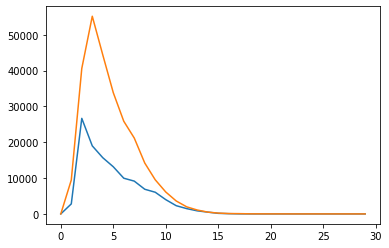

In [6]:
#On déclare une liste de fichier
listFiles = ["/content/Discours de la méthode by René Descartes.txt", "/content/Ulysses by James Joyce.txt"]

def DistribMotSelonTaille(listFiles) :
  for fileItem in listFiles :
    # Lecture
    fileRead = open(fileItem)
    chaine = fileRead.read ()
    fileRead.close()
    
    # Split
    listMot = chaine.split()

    # Dictionnaire
    dicLongueurs = setDicLongueur(listMot)

    listeEffectifs = []
    for toto in range(30):
      if toto in dicLongueurs :
        listeEffectifs.append(dicLongueurs[toto])
      else:
        listeEffectifs.append(0)
      
    pyplot.plot(listeEffectifs)
  pyplot.savefig("frequences.png")
  pyplot.show()

DistribMotSelonTaille(listFiles)


### Partie 2 : lister les textes d’un dossier
Si on a 1 000 fichiers à traiter, il sera bien fastidieux de rassembler tous les noms dans une liste

In [7]:
import glob 

print("On affiche le dossier contenant les fichiers :")
print(glob.glob("/content/*")) 

print("\n\n ===== ----- ===== \n\n")

dirPath = "/content"
def getArrayFilePath( dirpath ):
  filePathArray = []
  for item in glob.glob(dirpath+"/*.txt"):
    filePathArray.append(item)

  return filePathArray;

print(getArrayFilePath(dirPath))

On affiche le dossier contenant les fichiers :
['/content/Discours de la méthode by René Descartes.txt', '/content/data_languages.zip', '/content/frequences.png', '/content/Ulysses by James Joyce.txt', '/content/sample_data']


 ===== ----- ===== 


['/content/Discours de la méthode by René Descartes.txt', '/content/Ulysses by James Joyce.txt']


Nous avons créé une fonction qui créer un tableau contenant la list des fichiers (.txt) d'un dossier.

Maintenant nous allons utiliser la fonction précédantes pour afficher les informations trouvé mais en ajoutant une légende.

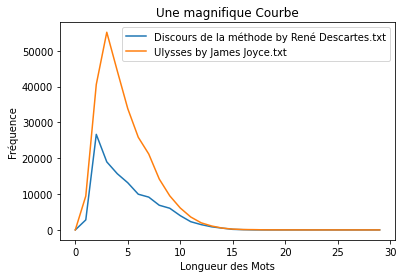

In [8]:
def DistribMotSelonTailleV2(listFiles) :
  for fileItem in listFiles :
    # Lecture
    fileRead = open(fileItem)
    chaine = fileRead.read ()
    fileRead.close()
    
    # Split
    listMot = chaine.split()

    # Dictionnaire
    dicLongueurs = setDicLongueur(listMot)

    listeEffectifs = []
    for toto in range(30):
      if toto in dicLongueurs :
        listeEffectifs.append(dicLongueurs[toto])
      else:
        listeEffectifs.append(0)
      
    #pyplot.plot(listeEffectifs)
    #nom_legende= fileItem

    # Evolution du code du prof (J'avais un bug lors du split)
    fileName = fileItem.split("/")
    nom_legende = fileName[len(fileName) - 1] #On prend le dernier element du tableau donc le nom

    pyplot.plot( listeEffectifs , label = nom_legende )


  # Ajout de la légende
  pyplot.legend ()
  pyplot.title("Une magnifique Courbe")
  pyplot.xlabel("Longueur des Mots")
  pyplot.ylabel("Fréquence")  

  # Save du file et affichage
  pyplot.savefig("frequences_V2.png")
  pyplot.show()

# Execution
arrayPath = getArrayFilePath(dirPath)
DistribMotSelonTailleV2(arrayPath)

## Exercice n°3 : Devoir à faire et à déposer en TD

In [9]:
!unzip data_languages.zip

Archive:  data_languages.zip
  inflating: data_languages/Langues_austronésiennes/Langues_isolantes_ou_analytiques/mi_maori.txt  
  inflating: data_languages/Langues_indo-européennes/Langues_celtiques/cy_welsh1.txt  
  inflating: data_languages/Langues_indo-européennes/Langues_celtiques/cy_welsh3.txt  
  inflating: data_languages/Langues sino-tibétaines/Langues_isolantes_ou_analytiques/zh_chinois.txt  
  inflating: data_languages/Langues_indo-européennes/Langues_italiques/pi_portuguese2.txt  
  inflating: data_languages/Langues_indo-européennes/langues_flexionnelles/la_latin.txt  
  inflating: data_languages/Langues_indo-européennes/Langues_hellénique/greek.txt  
  inflating: data_languages/Langues_austronésiennes/Langue_agglutinante/tl_tagalog.txt  
  inflating: data_languages/langues_chamito-sémitiques/he_hebreu.txt  
  inflating: data_languages/Langues_indo-européennes/Langues_italiques/pi_portuguese1.txt  
  inflating: data_languages/Langues_indo-européennes/Langues_celtiques/cy_wel

In [10]:
import os.path 

textsFolder = "/content/data_languages"

# Meme fonction que pour récupérer les éléments d'un dossier mais la on parcours les sous dossier aussi de façon récursif
def getTextPathMultiDir(dirPath) :
  textArray = []
  for item in glob.glob(dirPath+"/*") :
    if os.path.isdir(item): textArray.extend(getTextPathMultiDir(item)) 
    else: textArray.append(item) 
  
  return textArray


In [11]:
def DistribMotSelonTailleV3(listFiles) :
  for fileItem in listFiles :
    # Lecture
    fileRead = open(fileItem)
    chaine = fileRead.read ()
    fileRead.close()
    
    # Split
    listMot = chaine.split()
    listMot = set(listMot)

    # Dictionnaire
    dicLongueurs = setDicLongueur(listMot)

    listeEffectifs = []
    for toto in range(30):
      if toto in dicLongueurs :
        listeEffectifs.append(dicLongueurs[toto])
      else:
        listeEffectifs.append(0)
      
    #pyplot.plot(listeEffectifs)
    #nom_legende= fileItem

    # Evolution du code du prof (J'avais un bug lors du split)
    fileName = fileItem.split("/")
    nom_legende = fileName[len(fileName) - 1] #On prend le dernier element du tableau donc le nom

    pyplot.plot( listeEffectifs , label = nom_legende )


  # Ajout de la légende
  pyplot.legend ()
  pyplot.title("Une magnifique Courbe")
  pyplot.xlabel("Longueur des Mots")
  pyplot.ylabel("Fréquence")  

  # Save du file et affichage
  pyplot.savefig("frequences_V3.png")
  pyplot.show()

 ----- Affichage avec la fonction de base ----- 


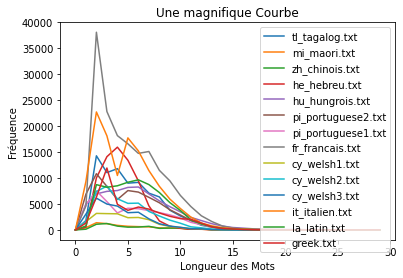



 ===== ----- ===== 


 ----- Affichage avec la fonction modifier (set()) -----


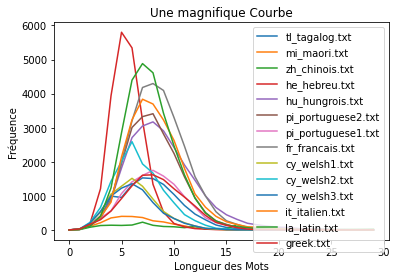

In [12]:
# On récupère les data
textArray = getTextPathMultiDir(textsFolder)

# On affiche avec la fonction faite précédemment 
print(" ----- Affichage avec la fonction de base ----- ")
DistribMotSelonTailleV2(textArray)

print("\n\n ===== ----- ===== \n\n")

# On affiche avec la fonction modfié
print(" ----- Affichage avec la fonction modifier (set()) -----")
DistribMotSelonTailleV3(textArray)

## Exercice Bonus

In [13]:
import sys
!{sys.executable} -m pip install mosestokenizer

print("\n\n ===== -- After Install -- ===== \n\n")

phrase = "L’élision est l’effacement d’une voyelle enfin de mot devant la voyelle commençant le mot suivant."

print(phrase.split())
from mosestokenizer import *
tokenize = MosesTokenizer(lang='fr')
mots = tokenize(phrase)
print(mots)


  Created wheel for mosestokenizer: filename=mosestokenizer-1.1.0-cp36-none-any.whl size=49120 sha256=cc7493a52f427e8fdc1bc83214dfcd9484bac4e200559d6e8db4857f5391fbe8
  Stored in directory: /root/.cache/pip/wheels/a2/e7/48/48d5e0f9c0cd5def2dfd7cb8543945f906448ed1313de24a29
  Created wheel for uctools: filename=uctools-1.3.0-cp36-none-any.whl size=6163 sha256=be6d9f581f1c5b595fd3bfc140de8a52d1a9254b1647887b163ff216a4dbe36c
  Stored in directory: /root/.cache/pip/wheels/06/b6/8f/935d5bf5bca85d47c6f5ec31641879bba057d336ab36b1e773
  Created wheel for toolwrapper: filename=toolwrapper-2.1.0-cp36-none-any.whl size=3355 sha256=0c259961f855dd277ad5941e6c0883873bd1f809ed4ec8a90840bfe8900b5f1a
  Stored in directory: /root/.cache/pip/wheels/84/ea/29/e02f3b855bf19344972092873a1091b329309bbc3d3d0cbaef
Successfully built mosestokenizer uctools toolwrapper


 ===== -- After Install -- ===== 


['L’élision', 'est', 'l’effacement', 'd’une', 'voyelle', 'enfin', 'de', 'mot', 'devant', 'la', 'voyelle', 'c

Tokenize work ! for zh
Tokenize work ! for hu
Tokenize work ! for fr
Tokenize work ! for it


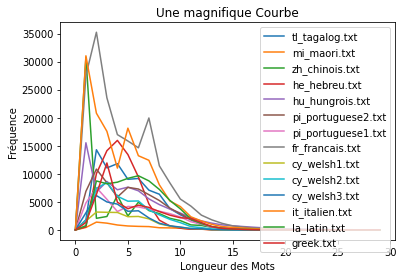

In [24]:
def DistribMotSelonTailleV4(listFiles) :
  for fileItem in listFiles :
    # Lecture
    fileRead = open(fileItem)
    chaine = fileRead.read ()
    fileRead.close()

    # Evolution du code du prof (J'avais un bug lors du split)
    fileName = fileItem.split("/")
    nom_legende = fileName[len(fileName) - 1] #On prend le dernier element du tableau donc le nom
    #En supposant que le format soit toujour langFormat (fr, it, ..) + _ + autre
    langue = nom_legende.split('_')[0]

    # Split
    #listMot = chaine.split()
    #listMot = set(listMot)

    # https://github.com/moses-smt/mosesdecoder/tree/master/scripts/share/nonbreaking_prefixes
    # Langues supportées par le tokenize
    langSupport = ["as", "bn", "ca", "cs", "de", "el", "en", "es", "et", "fi", "fr", "ga", "gu", "hi", "hu", "is", "it", "kn", "lt", "lv", "ml", "mni", "mr", "nl", "or", "pa", "pl", "pt", "ro", "ru", "sk", "sl", "sv", "ta", "te", "yue", "zh"]

    phrase = chaine.split()

    if langue in langSupport :
      try :
        tokenize = MosesTokenizer(langue)
        listMot = tokenize(chaine.replace("\n", ""))
        print("Tokenize work ! for "+langue)
        #tokenize.close()
      except :
        print("Tokenize doesnt work ! for "+langue)
        listMot = phrase
    else : 
      listMot = phrase
    #print(langue)
    #print(listMot)
    #print("=====")

    # Dictionnaire
    dicLongueurs = setDicLongueur(listMot)

    listeEffectifs = []
    for toto in range(30):
      if toto in dicLongueurs :
        listeEffectifs.append(dicLongueurs[toto])
      else:
        listeEffectifs.append(0)
      
    #pyplot.plot(listeEffectifs)
    #nom_legende= fileItem

    pyplot.plot( listeEffectifs , label = nom_legende )


  # Ajout de la légende
  pyplot.legend ()
  pyplot.title("Une magnifique Courbe")
  pyplot.xlabel("Longueur des Mots")
  pyplot.ylabel("Fréquence")  

  # Save du file et affichage
  pyplot.savefig("frequences_V4.png")
  pyplot.show()

#Execution 
DistribMotSelonTailleV4(textArray)